# Basic regression

In a *regression* problem, the aim is to predict the output of a continuous numeric value.

This tutorial will use a randomly generated dataset on which to practice making your first regression algorithm.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

##Make a nearly linear randomized dataset.

In [ ]:
#Define the parameters of the linear relationship
SLOPE = 2.0  # Slope of the line, this will be approximately what w should converge to
INTERCEPT = 8.0  # Intercept of the line, this will be approximately what b should converge to

NUM_POINTS = 100  # Number of training examples
Y_NOISE_SIZE = 10  # How big a variation from linear in the y direction, this will affect our error size
# Set range for x data
X_START = 3
X_END = 45
RSEED = 0  # set the seed for the random number so that we can all get the same data

# Generate random x values for training and testing
np.random.seed(RSEED)
x_train = np.random.uniform(X_START, X_END, NUM_POINTS)  # Generate 100 random x values between 0 and 10
x_train = np.sort(x_train)
x_test = np.random.uniform(X_START, X_END, NUM_POINTS)  # Generate 100 random x values between 0 and 10
x_test = np.sort(x_test)

# Generate normal random noise for y
y_noise = np.random.normal(0, Y_NOISE_SIZE, NUM_POINTS)

# Calculate the y values based on the linear relationship with noise
y_train = SLOPE * x_train + INTERCEPT + y_noise

##Plot our data to examine it.

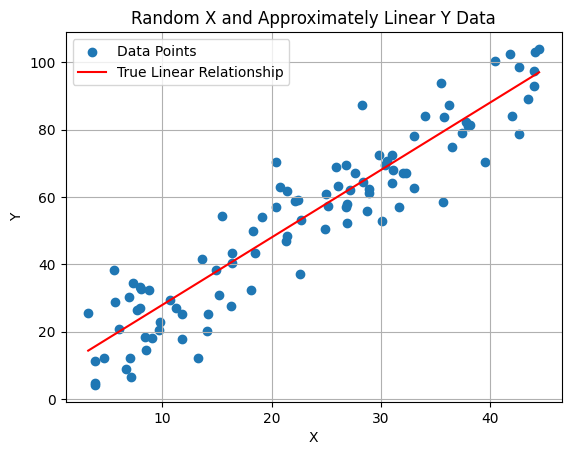

In [ ]:
# Plot the data points
plt.scatter(x_train, y_train, label='Data Points')

# Plot the true linear relationship without noise
true_y = SLOPE * x_train + INTERCEPT
plt.plot(x_train, true_y, color='red',
         #linewidth=1,
         label='True Linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Random X and Approximately Linear Y Data')
plt.grid(True)
plt.show()

Note in the plot above the red line represents the linear relationship that the randomness was imposed upon.  Given that the data was randomly generated as deviations from the red line, the best fit line for the random data will likely not be the red line, but it will be close.  This means our w and b should converge to a line that is very near the red line.  

## Train our Linear Regression model

In [ ]:
# Define the learning rate and the number of epochs
# Experiment with making the learning rate larger and smaller to see how it affects your results.
# What do you expect to happen with a learning rate that is too hight?
# What do you expect to happen with a learning rate that is too low?
LEARNING_RATE = 0.0025
EPOCHS = 10000000
EARLY_STOP = True
COST_THRESHOLD = 1e-5


# Initialize the coefficients (weights) with zeros
w = 0.0  # w (slope)
b = 0.0  # b (intercept)

# Initialize with a large value
prev_cost = float('inf')

# Lists to store cost values for plotting
cost_history = []

# Start measuring training time
start_time = time.time()

# Perform gradient descent to find the optimal coefficients
m = len(x_train)
for epoch in range(EPOCHS):
    w_gradient = 0.0  # Initialize dJ/dw for this epoch
    b_gradient = 0.0  # Initialize dJ/db for this epoch
    cost = 0.0        # Initialize cost for this epoch
    # this for loop computes my gradients, dJ/dw and dJ/db
    for i in range(m):
        xi = x_train[i]
        yi = y_train[i]
        error_i = w * xi + b - yi
        # Compute the cost for this data point
        cost = cost + error_i ** 2
        # Compute gradients for w & b at this point for this epoch
        w_gradient += xi * error_i # dJ/dw
        b_gradient += error_i # dJ/db
    # Update w & b for next epoch
    w = w - LEARNING_RATE * w_gradient / m
    b -= LEARNING_RATE * b_gradient / m
    # Append the cost to the history
    cost_history.append(cost / (2 * m))

    # Check for early stopping based on cost improvement
    if prev_cost - cost < COST_THRESHOLD and EARLY_STOP:
        EPOCHS = epoch
        break
    prev_cost = cost

# Stop measuring training time
end_time = time.time()
training_time = end_time - start_time



##Make predictions with our model

In [ ]:
# Make predictions using the trained model
y_test = w * x_test + b

##Examine model predictions and training

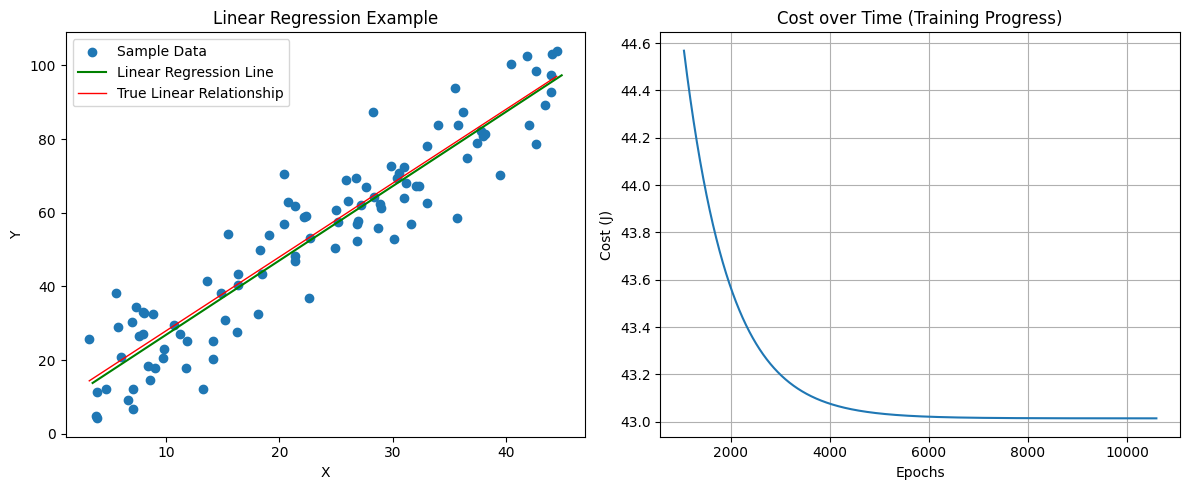

True Slope (m): 2.0          Model Slope (w): 2.0137221171135247
True Intercept (b): 8.0      Model Intercept (b): 6.779869267363972
Training Time: 1.36 seconds


In [ ]:
# Plot the original data and the linear regression line
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label='Sample Data')
plt.plot(x_test, y_test, color='green', label='Linear Regression Line')
plt.plot(x_train, true_y, color='red', linewidth=1, label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Example')

# Plot the cost over time (EPOCHS)
plt.subplot(1, 2, 2)
#plt.plot(range(EPOCHS), cost_history[:EPOCHS])
plt.plot(range(int(EPOCHS*0.1), len(cost_history)), cost_history[int(EPOCHS*0.1):])
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost over Time (Training Progress)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the learned coefficients (weights)
print("True Slope (m):", SLOPE, "         Model Slope (w):", w)
print("True Intercept (b):", INTERCEPT, "     Model Intercept (b):", b)
print(f"Training Time: {training_time:.2f} seconds")
